Text(0.5, 1.0, 'Transformed')

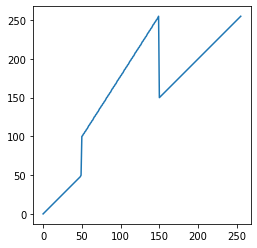

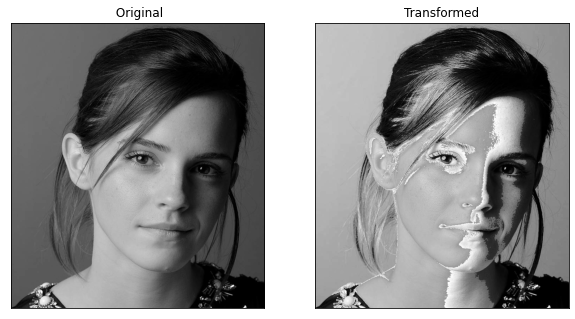

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread('./assingment1_images/emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)


t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
g = cv.LUT(f, t)


fig,axes = plt.subplots(1,2,sharex= 'all' , sharey='all',figsize = (10,10) )
axes[0].imshow(f, cmap ='gray',vmin=0,vmax=255)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(g, cmap ='gray',vmin=0,vmax=255)
axes[1].set_title('Transformed')

([], [])

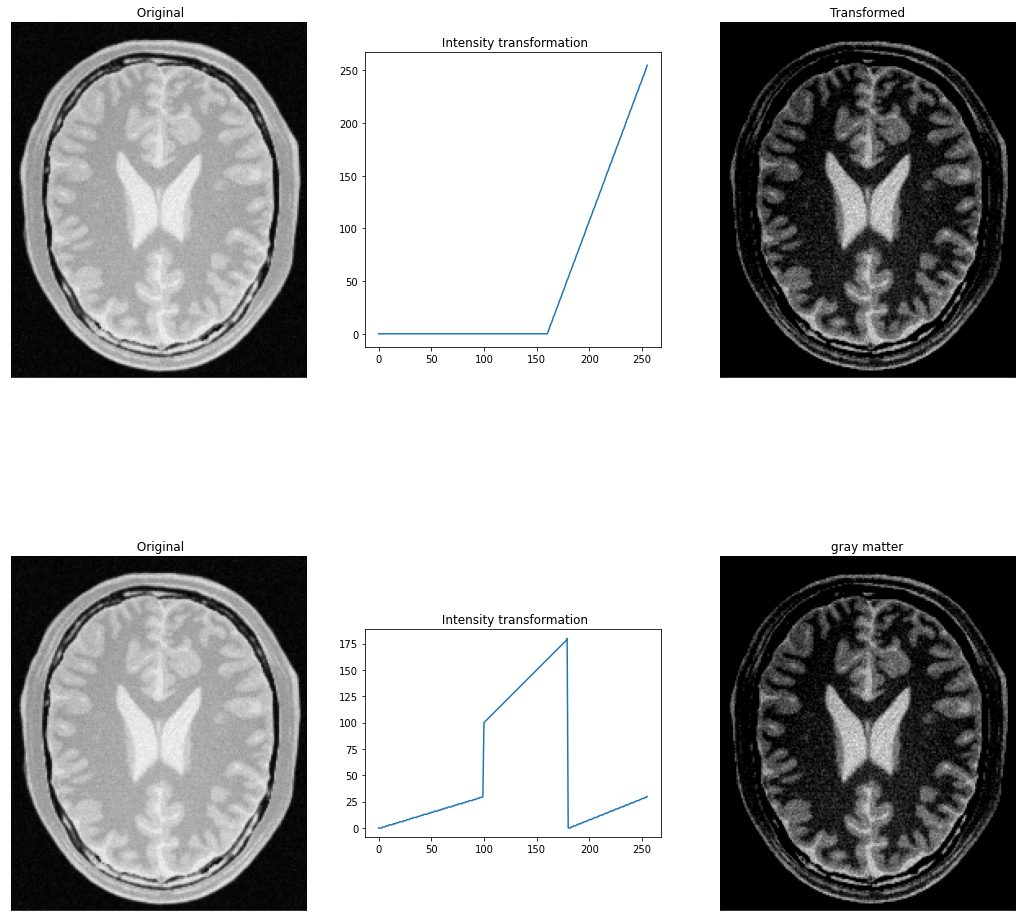

In [41]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain = cv.imread('./assingment1_images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

t1 = np.linspace(0,0,160)
t2 = np.linspace(0,255,96)
t = np.concatenate((t1,t2),axis=0).astype(np.uint8)
assert len(t) == 256
g = cv.LUT(brain, t)

s1 = np.linspace(0,30,100)
s2 = np.linspace(30,100,0)
s3 = np.linspace(100,180,80)
s4 = np.linspace(0,30,76)
s = np.concatenate((s1,s2,s3,s4),axis=0).astype(np.uint8)
assert len(s) == 256
g1 = cv.LUT(brain, t)



fig,axes = plt.subplots(2,3,figsize = (18,18))

axes[0,0].imshow(brain, cmap ='gray',vmin=0,vmax=255)
axes[0,0].set_title(' Original')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].plot(t)
axes[0,1].set_aspect('equal')
axes[0,1].set_title(' Intensity transformation')
axes[0,2].imshow(g, cmap ='gray',vmin=0,vmax=255)
axes[0,2].set_title('Transformed')
axes[0,2].set_xticks([]),axes[0,2].set_yticks([])

axes[1,0].imshow(brain, cmap ='gray',vmin=0,vmax=255)
axes[1,0].set_title(' Original')
axes[1,0].set_xticks([]),axes[1,0].set_yticks([])
axes[1,1].plot(s)
axes[1,1].set_aspect('equal')
axes[1,1].set_title(' Intensity transformation')
axes[1,2].imshow(g1, cmap ='gray',vmin=0,vmax=255)
axes[1,2].set_title('gray matter')
axes[1,2].set_xticks([]),axes[1,2].set_yticks([])